In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize



In [3]:
torch.manual_seed(42)

Source: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

Content
This dataset contains the following data:

* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences
* phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
* phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
* mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

In [8]:
# file = "./Datasets/mental_health/mental-heath-in-tech-2016_20161114.csv"  # Mental health in Tech # Do you currently have a mental health disorder?
# file = "./Datasets/smmh.csv" # social media and mental health,  https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health
file = "./Datasets/predictors_of_mental_health.csv" # Predictors of mental health


pand_data = pd.read_csv(file, sep=',', header=0, index_col=None)
index = ['Timestamp',
         'Age',
         'Gender',
         'Country',
         'state',
         'self_employed',
         'family_history',
         'treatment',
         'work_interfere',
         'no_employees',
         'remote_work',
         'tech_company',
         'benefits',
         'care_options',
         'wellness_program',
         'seek_help',
         'anonymity',
         'leave',
         'mental_health_consequence',
         'phys_health_consequence',
         'coworkers',
         'supervisor',
         'mental_health_interview',
         'phys_health_interview',
         'mental_vs_physical',
         'obs_consequence',
         'comments']


pand_data.columns = index
#pand_data

# Encode categorical labels
#label_encoder = LabelEncoder()
#data['Depression_Status'] = label_encoder.fit_transform(data['Depression_Status'])
#pand_data['Organization'].value_counts()


In [15]:
to_drop = ['Timestamp', 'state', 'comments']
pd_data = pand_data.drop(to_drop, axis=1)
#pd_data = pd_data.drop('organization', axis=1)
#categorical = ['Gender', '']

In [16]:
pd_data
# replace NaN with No

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Filter out categorical values

In [8]:
time_idx = media_data.columns.get_loc('Average_Time')
print(time_idx)

for index, row in media_data.iterrows():
    media_usage = row[time_idx]
    avg_t = 'Average_Time'
    if media_usage == 'Less than an Hour':
        media_data.at[index, avg_t] = 1
    elif media_usage == 'Between 1 and 2 hours':
        media_data.at[index, avg_t] = 2
    elif media_usage == 'Between 2 and 3 hours':
        media_data.at[index, avg_t] = 3
    elif media_usage == 'Between 3 and 4 hours':
        media_data.at[index, avg_t] = 4
    elif media_usage == 'Between 4 and 5 hours':
        media_data.at[index, avg_t] = 5
    elif media_usage == 'More than 5 hours':
        media_data.at[index, avg_t] = 6
        
media_data

5


/var/folders/vx/3_43vh0d5f918xvnc_z59dh40000gn/T/ipykernel_4384/3775412445.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_usage = row[time_idx]


,Age,Gender,Relationship_Status,Occupation_Status,Social_Media_Use,Average_Time,No_Specific_S.M.,SM_As_Distraction,Restlessness,Distraction_Level,...,Sleep,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,Pinterest,TikTok,Snapchat
0,21.0,Male,In a relationship,University Student,Yes,3,5,3,2,5,...,5,1,1,1,1,1,1,0,0,0
1,21.0,Female,Single,University Student,Yes,6,4,3,2,4,...,5,1,1,1,1,1,1,0,0,0
2,21.0,Female,Single,University Student,Yes,4,3,2,1,2,...,5,1,0,1,1,0,0,1,0,0
3,21.0,Female,Single,University Student,Yes,6,4,2,1,3,...,2,1,0,1,0,0,0,0,0,0
4,21.0,Female,Single,University Student,Yes,3,3,5,4,4,...,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,Yes,3,3,4,3,4,...,4,1,0,1,1,0,0,0,0,0
477,26.0,Female,Married,Salaried Worker,Yes,2,2,1,2,3,...,1,1,0,0,1,0,0,0,0,0
478,29.0,Female,Married,Salaried Worker,Yes,3,3,3,4,3,...,2,1,0,0,1,0,0,0,0,0
479,21.0,Male,Single,University Student,Yes,3,2,3,2,3,...,4,1,1,1,1,1,0,1,0,0


In [9]:
gender_idx = media_data.columns.get_loc('Gender')
print(gender_idx)

for index, row in media_data.iterrows():
    gender = row[gender_idx]
    gen = 'Gender'
    if not( gender == 'Male' or gender == 'Female'):
        media_data.at[index, gen] = 'Other'
    
media_data

1


/var/folders/vx/3_43vh0d5f918xvnc_z59dh40000gn/T/ipykernel_4384/1355741741.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender = row[gender_idx]


,Age,Gender,Relationship_Status,Occupation_Status,Social_Media_Use,Average_Time,No_Specific_S.M.,SM_As_Distraction,Restlessness,Distraction_Level,...,Sleep,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,Pinterest,TikTok,Snapchat
0,21.0,Male,In a relationship,University Student,Yes,3,5,3,2,5,...,5,1,1,1,1,1,1,0,0,0
1,21.0,Female,Single,University Student,Yes,6,4,3,2,4,...,5,1,1,1,1,1,1,0,0,0
2,21.0,Female,Single,University Student,Yes,4,3,2,1,2,...,5,1,0,1,1,0,0,1,0,0
3,21.0,Female,Single,University Student,Yes,6,4,2,1,3,...,2,1,0,1,0,0,0,0,0,0
4,21.0,Female,Single,University Student,Yes,3,3,5,4,4,...,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,Yes,3,3,4,3,4,...,4,1,0,1,1,0,0,0,0,0
477,26.0,Female,Married,Salaried Worker,Yes,2,2,1,2,3,...,1,1,0,0,1,0,0,0,0,0
478,29.0,Female,Married,Salaried Worker,Yes,3,3,3,4,3,...,2,1,0,0,1,0,0,0,0,0
479,21.0,Male,Single,University Student,Yes,3,2,3,2,3,...,4,1,1,1,1,1,0,1,0,0


In [10]:
# Get dummies for categorical values

In [11]:
dummies = pd.get_dummies(media_data[['Gender', 'Relationship_Status', 'Occupation_Status', 'Social_Media_Use']])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Gender_Female                          481 non-null    bool 
 1   Gender_Male                            481 non-null    bool 
 2   Gender_Other                           481 non-null    bool 
 3   Relationship_Status_Divorced           481 non-null    bool 
 4   Relationship_Status_In a relationship  481 non-null    bool 
 5   Relationship_Status_Married            481 non-null    bool 
 6   Relationship_Status_Single             481 non-null    bool 
 7   Occupation_Status_Retired              481 non-null    bool 
 8   Occupation_Status_Salaried Worker      481 non-null    bool 
 9   Occupation_Status_School Student       481 non-null    bool 
 10  Occupation_Status_University Student   481 non-null    bool 
 11  Social_Media_Use_No             

In [12]:
dummies.rename(columns={"Relationship_Status_Divorced":"Divorced",
                        "Relationship_Status_In a relationship":"In_A_Relationship",
                        "Relationship_Status_Married":"Married",
                        "Relationship_Status_Single":"Single",
                        "Occupation_Status_Retired":"Retired",
                        "Occupation_Status_Salaried Worker": "Worker",
                        "Occupation_Status_School Student":"School_Student",
                        "Occupation_Status_University Student":"University_Student",
                        "Social_Media_Use_No":"No_Social_Media_Use",
                        "Social_Media_Use_Yes":"Uses_Social_Media"}, inplace=True)

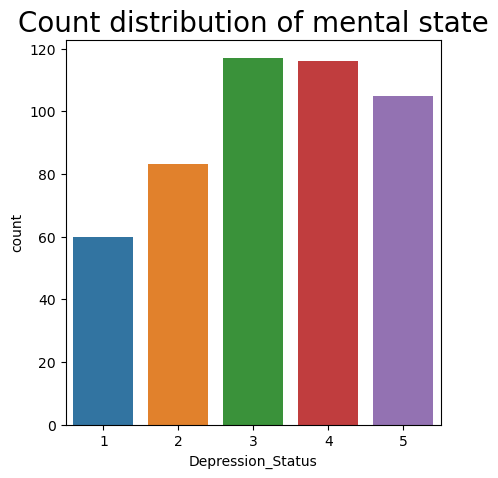

In [13]:
plt.figure(figsize=(6, 5), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="Depression_Status", data=media_data)
plt.title("Count distribution of mental state", size=20)
#plt.subplot(122)
labels=[0,1]
#plt.pie(df2["mental_disorder"].value_counts().values,autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()


# Split into X and y

In [14]:
# Separate features and labels
X = media_data.drop('Depression_Status', axis=1)
features = X.columns
y = media_data['Depression_Status']
y.value_counts()


Depression_Status
3    117
4    116
5    105
2     83
1     60
Name: count, dtype: int64

In [15]:
X_ = X.drop(['Gender', 'Relationship_Status', 'Occupation_Status', 'Social_Media_Use'], axis=1)
X = pd.concat([X_, dummies], axis=1)

In [16]:
# Select boolean columns
boolean_columns = X.select_dtypes(include='bool').columns

# Convert boolean columns to numerical booleans (0 and 1)
X[boolean_columns] = X[boolean_columns].astype(int)
X['Age'] = X['Age'].astype(int)

feature_names = X.columns
X = X.astype(float).values
y = y.astype(float).values

numpy.ndarray

In [17]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  split features into numerical and categorical.

In [18]:

def randomForestBaseline(X_train, y_train, X_test, y_test, feature_names):
    
    
    classes = np.unique(y_test)
    clf = RandomForestClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    #rgrs = RandomForestRegressor(max_depth=2, random_state=42)
    #rgrs.fit(X_train, y_train)
    
    #y_pred = rgrs.predict(X_test)
    print(len(y_pred))
    print(len(y_test))
    
    y_pred = np.round(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    
    y_test_binarized = label_binarize(y_test, classes=classes)
    y_pred_binarized = label_binarize(y_pred, classes=classes)
    auc_score = roc_auc_score(y_test_binarized, y_pred_binarized, multi_class="ovr")
    print(f'Area Under the Curve: {auc_score:.2f}')
    
    importances = clf.feature_importances_
    
    # Create a list of (importance, feature_name) tuples
    feature_importance_tuples = list(zip(importances, feature_names))
    
    check = feature_importance_tuples.copy()
    
    # Sort the feature importances in descending order
    feature_importance_tuples.sort(reverse=True, key=lambda x: x[0])
    
    # Print or access the ranked list of features
    ranked_features = []
    for importance, feature_name in feature_importance_tuples:
        ranked_features.append((feature_name))
    
    return(ranked_features)

randomForestBaseline(X_train, y_train, X_test, y_test, feature_names)

97
97
Accuracy: 0.37
Mean Squared Error: 1.32
Area Under the Curve: 0.62


['Worried',
 'Interest_Fluctuation',
 'Difficulty_Concentrating',
 'Comparisons',
 'Age',
 'SM_As_Distraction',
 'Sleep',
 'Distraction_Level',
 'Average_Time',
 'Feelings_About_Comparisons',
 'Married',
 'Gender_Male',
 'Worker',
 'No_Specific_S.M.',
 'Restlessness',
 'Validation',
 'University_Student',
 'Snapchat',
 'Gender_Female',
 'Twitter',
 'TikTok',
 'Pinterest',
 'In_A_Relationship',
 'School_Student',
 'Instagram',
 'Facebook',
 'Gender_Other',
 'Retired',
 'YouTube',
 'Discord',
 'Reddit',
 'Divorced',
 'Single',
 'No_Social_Media_Use',
 'Uses_Social_Media']

In [19]:

class AE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 4096),
            nn.ReLU(),
            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.Linear(2048, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 2048),
            nn.ReLU(),
            nn.Linear(2048, 4096),
            nn.ReLU(),
            nn.Linear(4096, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        latent = self.encoder(x)
        recon = self.decoder(latent)
        return recon, latent

class MLP(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

class CombinedModel(nn.Module):
    def __init__(self, ae, mlp):
        super(CombinedModel, self).__init__()
        self.ae = ae
        self.mlp = mlp

    def forward(self, x):
        recon, latent = self.ae(x)
        output = self.mlp(latent)
        return recon, output, latent


In [20]:
class CustomMSELoss(nn.Module):
    def __init__(self, rankings):
        super(CustomMSELoss, self).__init__()
        self.rankings = rankings

    def forward(self, recon_x, x):
        mse_loss = nn.MSELoss(reduction='none')
        loss = mse_loss(recon_x, x)
        weights = (1 + 1 / (self.rankings + 1))
        loss = loss * weights.expand_as(loss)
        return loss.mean()


In [21]:
def compute_gradients(model, data_loader):
    model.eval()
    gradient_accumulator = torch.zeros(X_train.shape[1])  # Initialize gradient accumulator
    count = 0
    for data, _ in data_loader:
        data.requires_grad = True
        model.zero_grad()
        recon, _, _ = model(data)
        loss = recon.sum()
        loss.backward()
        gradients = data.grad.abs().mean(dim=0)
        gradient_accumulator += gradients
        count += 1
    return gradient_accumulator / count  # Return average gradients

def update_rankings(rankings, gradients):
    normalized_gradients = gradients / gradients.sum()
    new_rankings = normalized_gradients.argsort(descending=True)
    return new_rankings


In [22]:
def train_model(model, train_loader, test_loader, num_epochs, rankings):
    auc_scores = []  # List to store AUC scores per epoch
    accuracy_scores = []  # List to store accuracy scores per epoch
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = CustomMSELoss(rankings)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            recon, output, _ = model(data)
            loss_recon = loss_fn(recon, data)
            loss_output = F.cross_entropy(output, target)
            loss = loss_recon + loss_output
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation phase
        model.eval()
        with torch.no_grad():
            all_predictions = []
            all_targets = []
            all_probabilities = []

            for data, target in test_loader:
                _, output, _ = model(data)
                probabilities = F.softmax(output, dim=1)
                predictions = torch.argmax(output, dim=1)
                all_predictions.extend(predictions.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
                all_probabilities.append(probabilities.cpu().numpy())

            all_probabilities = np.concatenate(all_probabilities)
            accuracy = accuracy_score(all_targets, all_predictions)
            accuracy_scores.append(accuracy)
            auc_score = roc_auc_score(all_targets, all_probabilities, multi_class='ovr')
            auc_scores.append(auc_score)

        if epoch % 5 == 0:
            gradients = compute_gradients(model, train_loader)
            rankings = update_rankings(rankings, gradients)
            loss_fn = CustomMSELoss(rankings)  # Update the loss function with new rankings

        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}')

    return model, rankings, accuracy_scores, auc_scores


In [23]:
# Encode categorical labels
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_train = label_encoder.fit_transform(y_train)

In [24]:

# Convert arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 20

In [25]:

# Initialize feature rankings uniformly
initial_rankings = torch.ones(X_train.shape[1])  # Adjust size to match input feature count
model = CombinedModel(AE(X_train.shape[1], 2048), MLP(2048, len(np.unique(y_train))))

# Train the model
model, final_rankings, accuracy_scores, auc_scores = train_model(model, train_loader, test_loader, num_epochs, initial_rankings)




Epoch 1, Loss: 3.0853, Accuracy: 0.2577, AUC: 0.6853
Epoch 2, Loss: 2.4645, Accuracy: 0.3814, AUC: 0.7361
Epoch 3, Loss: 2.3297, Accuracy: 0.3918, AUC: 0.7222
Epoch 4, Loss: 2.1657, Accuracy: 0.3402, AUC: 0.7295
Epoch 5, Loss: 1.9851, Accuracy: 0.4536, AUC: 0.7371
Epoch 6, Loss: 1.9674, Accuracy: 0.3814, AUC: 0.7196
Epoch 7, Loss: 1.7473, Accuracy: 0.4330, AUC: 0.7163
Epoch 8, Loss: 1.5877, Accuracy: 0.4124, AUC: 0.7251
Epoch 9, Loss: 1.4588, Accuracy: 0.3918, AUC: 0.7433
Epoch 10, Loss: 1.3918, Accuracy: 0.3711, AUC: 0.7100
Epoch 11, Loss: 1.3859, Accuracy: 0.2990, AUC: 0.6899
Epoch 12, Loss: 1.3292, Accuracy: 0.3814, AUC: 0.6841
Epoch 13, Loss: 1.3115, Accuracy: 0.3505, AUC: 0.6748
Epoch 14, Loss: 1.2553, Accuracy: 0.3711, AUC: 0.6798
Epoch 15, Loss: 1.1604, Accuracy: 0.3814, AUC: 0.6897
Epoch 16, Loss: 1.1576, Accuracy: 0.3711, AUC: 0.7146
Epoch 17, Loss: 1.2060, Accuracy: 0.3505, AUC: 0.6790
Epoch 18, Loss: 1.2210, Accuracy: 0.3505, AUC: 0.6846
Epoch 19, Loss: 1.1260, Accuracy: 0.3

In [26]:
# Get indices of the top 100 features based on the rankings
top_indices = final_rankings.argsort(descending=True)
top_features = [feature_names.values[idx] for idx in top_indices]

print("Top Features:")
print(top_features)

Top Features:
['Uses_Social_Media', 'No_Social_Media_Use', 'Gender_Other', 'Gender_Male', 'Married', 'School_Student', 'TikTok', 'Retired', 'Discord', 'Divorced', 'University_Student', 'Pinterest', 'YouTube', 'Feelings_About_Comparisons', 'Interest_Fluctuation', 'Comparisons', 'Twitter', 'No_Specific_S.M.', 'Worker', 'Single', 'Sleep', 'Reddit', 'Restlessness', 'Age', 'Gender_Female', 'Instagram', 'SM_As_Distraction', 'Difficulty_Concentrating', 'Average_Time', 'Distraction_Level', 'Validation', 'Facebook', 'Worried', 'Snapchat', 'In_A_Relationship']
